# Instalar Librerias

In [9]:
pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0)
ERROR: No matching distribution found for tensorflow==2.4.1

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


- tensorflow==2.4.1: Una biblioteca para cálculos numéricos y aprendizaje automático que permite la construcción y entrenamiento de modelos de redes neuronales.
- tensorflow-gpu==2.4.1: La misma biblioteca que TensorFlow, pero optimizada para usar con GPUs NVIDIA, lo que permite un entrenamiento y procesamiento más rápido de los modelos de aprendizaje automático.
- opencv-python: Una biblioteca de Python para visión por computadora y procesamiento de imágenes.
- mediapipe: Una biblioteca para el procesamiento de flujos de datos multimedia, que incluye herramientas para visión por computadora y aprendizaje automático.
- sklearn: Es el nombre común para scikit-learn, una biblioteca para aprendizaje automático que proporciona herramientas para análisis de datos y modelado estadístico.
- matplotlib: Una biblioteca de trazado gráfico 2D que produce figuras de calidad de publicación en una variedad de formatos impresos y entornos interactivos en todas las plataformas.

# Librerias Necesarias

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from sklearn.preprocessing import StandardScaler
import matplotlib.animation as animation
import tkinter as tk
from PIL import Image, ImageTk
import glob

- cv2: Este es el módulo de OpenCV para Python, que proporciona herramientas para el procesamiento de imágenes y visión por computadora.
- numpy: Una biblioteca fundamental para la computación científica en Python. Proporciona un objeto de matriz multidimensional de alto rendimiento y herramientas para trabajar con estas matrices.
- os: Este módulo proporciona una forma portátil de utilizar la funcionalidad dependiente del sistema operativo, como leer o escribir en el sistema de archivos.
- pyplot de matplotlib: Es una colección de funciones que hacen que matplotlib funcione como MATLAB. Cada función de pyplot realiza algún cambio en una figura: por ejemplo, crea una figura, crea un área de trazado en una figura, traza algunas líneas en un área de trazado, decora el trazado con etiquetas, etc.
- time: Este módulo proporciona varias funciones relacionadas con el tiempo, como esperar durante un número específico de segundos.
- mediapipe: Una biblioteca para el procesamiento de flujos de datos multimedia, que facilita la construcción de pipelines para la entrada, procesamiento y salida de datos multimedia.

# Preparación de puntos

In [2]:
# Establezco 'mp_holistic' como mi módulo holístico de MediaPipe para que pueda acceder a sus funciones.
mp_holistic = mp.solutions.holistic
# Establezco 'mp_drawing' como mi módulo de utilidades de dibujo de MediaPipe para que pueda usarlo para dibujar las marcas de referencia en mis imágenes.
mp_drawing = mp.solutions.drawing_utils

- El modelo holístico de MediaPipe es capaz de detectar y rastrear poses, manos y caras simultáneamente. Esta línea te permite acceder a las funciones y modelos del módulo holistic de manera más cómoda.
- mp_drawing. Este módulo contiene utilidades para dibujar las detecciones de MediaPipe en imágenes. Por ejemplo, si detectas las manos en una imagen, puedes utilizar este módulo para dibujar los puntos de referencia de la mano en la imagen.


In [3]:
def mediapipe_detection(image, model):
    # Primero, convierto mi imagen de BGR (formato de OpenCV) a RGB porque MediaPipe así lo requiere.
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Luego, hago mi imagen no modificable para mejorar el rendimiento durante el procesamiento del modelo.
    image.flags.writeable = False
    # Proceso mi imagen con el modelo dado
    results = model.process(image)
    # Ahora que he terminado el procesamiento, hago mi imagen modificable nuevamente.
    image.flags.writeable = True
    # Convierto mi imagen de vuelta a BGR para poder trabajar con ella en OpenCV después.
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    # Devuelvo tanto mi imagen (ahora en BGR nuevamente) como los resultados del procesamiento del modelo.
    return image, results


In [4]:
def draw_landmarks(image, results):
    # Dibujo las conexiones de la malla de mi rostro si están disponibles.
    """ mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) """
    # Dibujo las conexiones de mi pose corporal si están disponibles.
    """ mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) """
    # Dibujo las conexiones de mi mano izquierda si están disponibles.
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    # Dibujo las conexiones de mi mano derecha si están disponibles.
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)


Esta función es muy útil porque me permite procesar cualquier imagen con cualquier modelo de MediaPipe de manera eficiente y sencilla. La uso para asegurarme de que mis imágenes están en el formato correcto antes y después del procesamiento, y para obtener los resultados de la detección o seguimiento que necesito para mi aplicación.

In [5]:
def draw_styled_landmarks(image, results):
    # Dibujo las conexiones de mi rostro con colores y grosores específicos.
    """ mp_drawing.draw_landmarks(
        image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
        mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
        mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
    ) """
    # Dibujo las conexiones de mi pose con otro conjunto de colores y grosores.
    """ mp_drawing.draw_landmarks(
        image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
        mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
    )  """
    # Para mi mano izquierda, elijo colores y grosores que me gustan, para diferenciarla visualmente.
    mp_drawing.draw_landmarks(
        image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
        mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
        mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
    ) 
    # Y hago lo mismo para mi mano derecha, utilizando una paleta de colores distinta para distinguirla fácilmente.
    mp_drawing.draw_landmarks(
        image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
        mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
        mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
    ) 

En esta función, uso la DrawingSpec para personalizar cómo se dibujan las marcas de referencia y sus conexiones. Por cada tipo de marca (cara, pose, mano izquierda, mano derecha), especifico colores y grosores diferentes:
- Color: Lo defino usando una tupla de tres valores que representan el color en el espacio RGB (Rojo, Verde, Azul).
- Thickness: Especifico el grosor de las líneas que conectan las marcas de referencia.
- Circle_radius: Defino el tamaño de los círculos que representan las marcas de referencia.

In [7]:
# Inicio capturando video de mi cámara web.
cap = cv2.VideoCapture(0)
# Configuro el modelo de MediaPipe Holistic con un cierto nivel de confianza mínimo para la detección y el seguimiento.
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Mantengo el bucle mientras mi cámara esté activa.
    while cap.isOpened():
        # Leo los frames de mi cámara web.
        ret, frame = cap.read()
        # Si logro leer un frame correctamente, procedo con las detecciones.
        # Realizo detecciones en el frame actual.
        image, results = mediapipe_detection(frame, holistic)
        print(results)  # Imprimo los resultados para depuración.
        # Dibujo las marcas de referencia detectadas en el frame.
        draw_styled_landmarks(image, results)
        # Muestro el frame procesado en una ventana.
        cv2.imshow('OpenCV Feed', image)
        # Espero una tecla para salir del bucle. Si presiono 'q', termino el bucle.
        if cv2.waitKey(10) & 0xFF == ord('q') or 0xFF == ord('w') or 0xFF == ord('e'):
            break
    # Libero la cámara y cierro todas las ventanas abiertas al finalizar.
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

Este código me permite ver en tiempo real cómo el modelo Holistic de MediaPipe detecta y sigue mi postura, las características de mi cara y las posiciones de mis manos. Utilizo las funciones mediapipe_detection para procesar los frames capturados y draw_styled_landmarks para visualizar las detecciones con estilos personalizados.

Al ejecutar este script, se abrirá una ventana que muestra el video capturado por mi cámara web, junto con las marcas de referencia de la postura, la cara y las manos dibujadas sobre mí en tiempo real. Puedo cerrar esta ventana y terminar el script presionando la tecla 'q'.

In [10]:
# Verificar y mostrar información sobre la detección de la cara
if results.face_landmarks:
    print(f"Se detectó la cara con {len(results.face_landmarks.landmark)} puntos de referencia.")
else:
    print("No se detectó la cara en este frame.")
# Verificar y mostrar información sobre la detección de la mano izquierda
if results.left_hand_landmarks:
    print(f"Se detectó la mano izquierda con {len(results.left_hand_landmarks.landmark)} puntos de referencia.")
else:
    print("No se detectó la mano izquierda en este frame.")
# Verificar y mostrar información sobre la detección de la mano derecha
if results.right_hand_landmarks:
    print(f"Se detectó la mano derecha con {len(results.right_hand_landmarks.landmark)} puntos de referencia.")
else:
    print("No se detectó la mano derecha en este frame.")
# Verificar y mostrar información sobre la detección de la pose
if results.pose_landmarks:
    print(f"Se detectaron puntos de referencia de la pose con {len(results.pose_landmarks.landmark)} puntos de referencia.")
else:
    print("No se detectaron puntos de referencia de la pose en este frame.")

Se detectó la cara con 468 puntos de referencia.
No se detectó la mano izquierda en este frame.
Se detectó la mano derecha con 21 puntos de referencia.
Se detectaron puntos de referencia de la pose con 33 puntos de referencia.


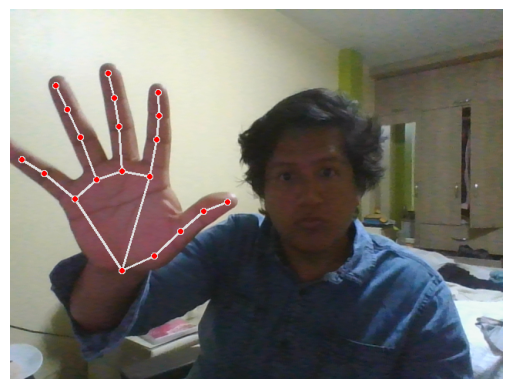

In [8]:
draw_landmarks(frame, results)  # Dibuja las marcas de referencia en el frame
# Convierte el frame de BGR a RGB
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
# Usa matplotlib para mostrar la imagen
plt.imshow(frame_rgb)
plt.axis('off')  # Opcional: oculta los ejes para una visualización más limpia
plt.show()

In [25]:
import cv2
import mediapipe as mp
import numpy as np

mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

def draw_styled_landmarks_no_background(image, results):
    black_image = np.zeros(image.shape, dtype=np.uint8)
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            black_image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=2, circle_radius=2)
        )
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            black_image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2)
        )
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            black_image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2)
        )

    mask = cv2.cvtColor(black_image, cv2.COLOR_BGR2GRAY)
    background_image = np.zeros_like(image, dtype=np.uint8)
    background_image[mask != 0] = image[mask != 0]

    return background_image

# Cargar el video
cap = cv2.VideoCapture('Videos/10.mp4')

# Obtener las propiedades del video de entrada
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Definir el codec y crear un objeto VideoWriter
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('Resultados/10.mp4', fourcc, fps, (frame_width, frame_height))

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Procesar la imagen
        _, results = mediapipe_detection(frame, holistic)
        # Dibujar las marcas de referencia
        frame_processed = draw_styled_landmarks_no_background(frame, results)

        # Escribir el frame en el archivo de salida
        out.write(frame_processed)

# Liberar recursos
cap.release()
out.release()


In [6]:
import tkinter as tk

# Crear la ventana principal
root = tk.Tk()
root.title("Interpretador de números")

# Definir el tamaño de la ventana
root.geometry('800x600')

# Crear un frame para la sección de entrada y botón de traducción
top_frame = tk.Frame(root)
top_frame.pack(side=tk.TOP, pady=20)

# Entrada de texto donde aparecerá el número seleccionado
number_entry = tk.Entry(top_frame, font=('Arial', 20), width=10)
number_entry.pack(side=tk.LEFT)

# Botón de "Traducir"
translate_button = tk.Button(top_frame, text="TRADUCIR", font=('Arial', 20))
translate_button.pack(side=tk.LEFT, padx=10)

# Crear un frame para los botones numéricos y el canvas del avatar
middle_frame = tk.Frame(root)
middle_frame.pack(expand=True)

# Frame para los botones numéricos
buttons_frame = tk.Frame(middle_frame)
buttons_frame.pack(side=tk.LEFT, padx=20)

# Función para manejar la presión de los botones numéricos
def button_press(number):
    number_entry.delete(0, tk.END)  # Borrar la entrada actual
    number_entry.insert(0, str(number))  # Insertar el número presionado

# Crear y agregar los botones numéricos a la ventana
for number in range(1, 10):
    button = tk.Button(buttons_frame, text=str(number), font=('Arial', 20), command=lambda n=number: button_press(n))
    button.grid(row=(number-1)//3, column=(number-1)%3, padx=5, pady=5)

# Botón para el número 0
zero_button = tk.Button(buttons_frame, text='0', font=('Arial', 20), command=lambda: button_press(0))
zero_button.grid(row=3, column=1, padx=5, pady=5)

# Frame para el canvas del avatar, más grande y a la derecha
avatar_frame = tk.Frame(middle_frame)
avatar_frame.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)

# Crear el canvas para el avatar, más grande
avatar_canvas = tk.Canvas(avatar_frame, width=400, height=600, bg='black')
avatar_canvas.pack(side=tk.RIGHT, padx=20, pady=20, fill=tk.BOTH, expand=True)

# Iniciar la aplicación
root.mainloop()


In [10]:
import tkinter as tk
from tkinter import messagebox
from PIL import Image, ImageTk
import cv2

# Crear la ventana principal
root = tk.Tk()
root.title("Interpretador de números")

# Definir el tamaño de la ventana
root.geometry('900x900')

""" # Variables para controlar la reproducción del video
video_path = '1.mp4'  # Asegúrate de que el video se encuentre en el mismo directorio
cap = cv2.VideoCapture(video_path)
playing = False
 """
# Función para establecer la fuente de vídeo
def set_video_source(number):
    global cap, playing
    # Detener el vídeo si está reproduciéndose
    if playing:
        stop_video()
    # Liberar el capturador de vídeo actual
    cap.release()
    # Crear un nuevo capturador de vídeo con el archivo correspondiente al número
    video_path = f'Resultados/{number}.mp4'  # Construye el nombre del archivo basado en el número
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        messagebox.showerror("Error", f"No se pudo abrir el vídeo para el número {number}.")
    else:
        play_video()

# Función para manejar el botón "TRADUCIR"
def translate():
    number = number_entry.get()
    if number.isdigit():  # Verifica si la entrada es un número
        set_video_source(number)  # Establece la fuente de vídeo y comienza la reproducción
    else:
        messagebox.showinfo("Info", "Por favor, introduce un número para reproducir el vídeo correspondiente.")


def play_video():
    global playing
    playing = True
    play_next_frame()

def stop_video():
    global playing
    playing = False

def play_next_frame():
    global playing, cap, photo  # Asegúrate de incluir photo aquí para mantener la referencia
    if playing:
        ret, frame = cap.read()
        if ret:
            # Redimensionar el frame a las dimensiones deseadas
            # En este caso, lo redimensionamos para que se ajuste al tamaño del canvas de Tkinter
            frame = cv2.resize(frame, (600, 600))  # Ajusta estos valores al tamaño de tu canvas
            
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            photo = ImageTk.PhotoImage(image=Image.fromarray(frame))
            avatar_canvas.create_image(0, 0, image=photo, anchor=tk.NW)
            # Es importante mantener la referencia a photo dentro de la función
            avatar_canvas.image = photo  
            root.after(int(1000/cap.get(cv2.CAP_PROP_FPS)), play_next_frame)
        else:
            playing = False
            cap.set(cv2.CAP_PROP_POS_FRAMES, 0)


""" # Función para manejar el botón "TRADUCIR"
def translate():
    if number_entry.get() == '1':
      
        play_video()
    else:
        messagebox.showinfo("Info", "Introduce el número 1 para reproducir el video.") """

# Crear un frame para la sección de entrada y botón de traducción
top_frame = tk.Frame(root)
top_frame.pack(side=tk.TOP, pady=20)

# Entrada de texto donde aparecerá el número seleccionado
number_entry = tk.Entry(top_frame, font=('Arial', 20), width=10)
number_entry.pack(side=tk.LEFT)

# Botón de "Traducir"
translate_button = tk.Button(top_frame, text="TRADUCIR", font=('Arial', 20), command=translate)
translate_button.pack(side=tk.LEFT, padx=10)

# Crear un frame para los botones numéricos y el canvas del avatar
middle_frame = tk.Frame(root)
middle_frame.pack(expand=True)

# Frame para los botones numéricos
buttons_frame = tk.Frame(middle_frame)
buttons_frame.pack(side=tk.LEFT, padx=20)

# Función para manejar la presión de los botones numéricos
def button_press(number):
    number_entry.delete(0, tk.END)  # Borrar la entrada actual
    number_entry.insert(0, str(number))  # Insertar el número presionado

# Crear y agregar los botones numéricos a la ventana
for number in range(1, 10):
    button = tk.Button(buttons_frame, text=str(number), font=('Arial', 20), command=lambda n=number: button_press(n))
    button.grid(row=(number-1)//3, column=(number-1)%3, padx=5, pady=5)

# Botón para el número 0
zero_button = tk.Button(buttons_frame, text='0', font=('Arial', 20), command=lambda: button_press(0))
zero_button.grid(row=3, column=1, padx=5, pady=5)

# Crear un canvas para el avatar
avatar_canvas = tk.Canvas(root, width=600, height=600, bg='black')
avatar_canvas.pack(side=tk.RIGHT, padx=20, pady=20)

# Iniciar la aplicación
root.mainloop()

# Liberar recursos de video al cerrar la ventana
cap.release()


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Carlos PV\AppData\Local\Programs\Python\Python310\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\Carlos PV\AppData\Local\Temp\ipykernel_14872\4162359779.py", line 38, in translate
    set_video_source(number)  # Establece la fuente de vídeo y comienza la reproducción
  File "C:\Users\Carlos PV\AppData\Local\Temp\ipykernel_14872\4162359779.py", line 22, in set_video_source
    if playing:
NameError: name 'playing' is not defined


NameError: name 'cap' is not defined

In [11]:
import cv2
import mediapipe as mp

# Inicialización de MediaPipe
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Función para procesar cada frame del video
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

# Función para dibujar las marcas de referencia en un frame con fondo negro
def draw_styled_landmarks_no_background(image, results):
    black_image = np.zeros(image.shape, dtype=np.uint8)
    # Asegúrate de que los siguientes métodos draw_landmarks usen el black_image como fondo
    # ... (aquí va el resto del código que dibuja las landmarks) ...
    return black_image

# Cargar el video
video_path = '1.mp4'
cap = cv2.VideoCapture(video_path)

# Obtener las propiedades del video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Definir el codec y crear el objeto VideoWriter
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # o 'XVID' si 'mp4v' no funciona
out = cv2.VideoWriter('resultado.mp4', fourcc, fps, (frame_width, frame_height))

# Configurar el modelo de MediaPipe Holistic
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Procesar el frame
        _, results = mediapipe_detection(frame, holistic)

        # Dibujar las landmarks en un fondo negro
        black_image = draw_styled_landmarks_no_background(frame, results)

        # Escribir el frame en el nuevo video
        out.write(black_image)

        # Opcional: Mostrar el frame en tiempo real (comenta esta parte si no es necesario)
        # cv2.imshow('MediaPipe Feed', black_image)
        # if cv2.waitKey(1) & 0xFF == ord('q'):
        #     break

# Liberar todo al terminar
cap.release()
out.release()
cv2.destroyAllWindows()


In [9]:
import cv2
import numpy as np
import mediapipe as mp

# Inicializaciones de MediaPipe
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Función para procesar la imagen con el modelo
def mediapipe_detection(image, model):
    # Conversión de colores y proceso del modelo
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

# Función para dibujar las marcas de referencia en una imagen con fondo blanco
def draw_styled_landmarks_no_background(image, results):
    # Crear una imagen en negro que actuará como la máscara
    black_image = np.zeros(image.shape, dtype=np.uint8)

    # Dibujar las marcas de referencia en la máscara con los colores deseados
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            black_image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=2, circle_radius=2)
        )
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            black_image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2)
        )
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            black_image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2)
        )

    # Crear una imagen completamente blanca del mismo tamaño que la imagen original
    white_image = np.ones_like(image) * 0

    # Aplicar la máscara a la imagen blanca
    mask = cv2.cvtColor(black_image, cv2.COLOR_BGR2GRAY)
    white_image[mask != 0] = black_image[mask != 0]

    return white_image

# Leer una imagen desde un archivo o usar una capturada por tu cámara web
# Por ejemplo, si tienes una imagen guardada como 'image.png'
image = cv2.imread('prueba4.png')

# Configurar el modelo de MediaPipe Holistic
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Procesar la imagen capturada
    image_, results = mediapipe_detection(image, holistic)
    
    # Dibujar las marcas de referencia en una imagen con fondo blanco
    white_image = draw_styled_landmarks_no_background(image, results)
    
    # Mostrar la imagen resultante
    cv2.imshow('Landmarks on White Background', white_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [77]:
import cv2
import numpy as np
import mediapipe as mp

# Inicialización de MediaPipe
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Función para procesar la imagen con el modelo
def mediapipe_detection(image, model):
    # Conversión de colores y proceso del modelo
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

# Función para dibujar las marcas de referencia en una imagen con fondo de color sólido
def draw_styled_landmarks_no_background(image, results):
    # Crear una imagen negra que actuará como la máscara
    black_image = np.zeros(image.shape, dtype=np.uint8)

    # Dibujar las marcas de referencia en la máscara con los colores deseados
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            black_image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=2, circle_radius=2)
        )
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            black_image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2)
        )
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            black_image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2)
        )

    # Crear una imagen del color de fondo deseado
    background_color = (255, 255, 255)  # Color blanco
    background_image = np.ones_like(image, dtype=np.uint8) * background_color

    # Aplicar la máscara a la imagen de fondo
    mask = cv2.cvtColor(black_image, cv2.COLOR_BGR2GRAY)
    background_image[mask != 0] = black_image[mask != 0]

    return background_image

# Iniciar captura de video de la cámara web
# Iniciar captura de video de la cámara web
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        # Procesar la imagen capturada
        image, results = mediapipe_detection(frame, holistic)

        # Dibujar las marcas de referencia en una imagen con fondo de color sólido
        white_image = draw_styled_landmarks_no_background(image, results)

        # Mostrar la imagen resultante
        cv2.imshow('OpenCV Feed', white_image)

        # Romper el bucle con la tecla 'q'
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
# Libero la cámara y cierro todas las ventanas abiertas al finalizar.
cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.8.1) D:/a/opencv-python/opencv-python/opencv/modules/highgui/src/precomp.hpp:155: error: (-215:Assertion failed) src_depth != CV_16F && src_depth != CV_32S in function 'convertToShow'


: 

In [1]:
import matplotlib.pyplot as plt

# Suponiendo que `white_image` es la imagen que quieres mostrar
plt.imshow(cv2.cvtColor(white_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Oculta los ejes
plt.show()

NameError: name 'cv2' is not defined

# Preparación de Extracción de los puntos de los frames

In [12]:
# Inicio con una lista vacía para almacenar los puntos de referencia de la pose
pose = []
# Itero sobre cada punto de referencia en los resultados de la pose
for res in results.pose_landmarks.landmark:
    # Para cada punto de referencia, creo un arreglo de NumPy con sus coordenadas X, Y, Z y el valor de visibilidad
    # La visibilidad indica qué tan probable es que el punto de referencia sea visible (no ocluido) en la imagen
    test = np.array([res.x, res.y, res.z, res.visibility])
    # Agrego el arreglo de NumPy a mi lista 'pose'
    pose.append(test)
# Ahora, 'pose' contiene un arreglo de NumPy para cada punto de referencia de la pose detectada
# Cada arreglo tiene las coordenadas X, Y, Z del punto y su valor de visibilidad

Este código asume que ya has procesado una imagen o un frame con el modelo Holistic de MediaPipe y tienes los resultados almacenados en results. La lista pose se llena con arreglos de NumPy, cada uno representando un punto de referencia de la pose detectada, incluyendo sus coordenadas en el espacio y un valor que indica la probabilidad de que cada punto sea visible en la imagen.

Este enfoque te permite tener una representación numérica precisa de la pose detectada, facilitando el análisis posterior, la visualización o incluso el uso de estos datos para entrenar modelos de aprendizaje automático o realizar cálculos adicionales.

In [13]:
# Transformo las coordenadas de los puntos de referencia de la pose en un arreglo de NumPy y lo aplano.
# Si no se detectan puntos de referencia de la pose, genero un arreglo de ceros de tamaño adecuado.
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() \
    if results.pose_landmarks else np.zeros(132)  # 33 puntos * 4 atributos (X, Y, Z, visibilidad)

# Hago lo mismo para los puntos de referencia de la cara, pero solo incluyo las coordenadas X, Y, Z.
# Aplano el arreglo resultante, y si no hay detecciones, genero un arreglo de ceros de longitud adecuada.
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() \
    if results.face_landmarks else np.zeros(1404)  # 468 puntos * 3 atributos (X, Y, Z)

# Para la mano izquierda, creo un arreglo de NumPy con las coordenadas X, Y, Z de cada punto detectado y lo aplano.
# Genero un arreglo de ceros de longitud adecuada si no se detecta la mano izquierda.
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() \
    if results.left_hand_landmarks else np.zeros(21*3)  # 21 puntos * 3 atributos (X, Y, Z)

# Repito el proceso para la mano derecha, generando un arreglo aplanado de las coordenadas de los puntos de referencia.
# Si no se detecta la mano derecha, genero un arreglo de ceros de la misma longitud que para la mano izquierda.
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() \
    if results.right_hand_landmarks else np.zeros(21*3)  # 21 puntos * 3 atributos (X, Y, Z)

La decisión de incluir el valor de visibilidad solo para la pose y no para la cara o las manos refleja las diferencias en cómo se utilizan estas detecciones en aplicaciones prácticas y los desafíos únicos que presenta cada tipo de detección. Esto demuestra la importancia de adaptar el procesamiento de datos y las características utilizadas a las especificidades de cada tipo de modelo y las necesidades de la aplicación final.

In [17]:
def extract_keypoints(results):
    # Extraigo los puntos de referencia de la pose y los aplano en un solo vector.
    # Si no se detectan puntos de la pose, genero un vector de ceros de tamaño 33*4.
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() \
        if results.pose_landmarks else np.zeros(33*4)
    # Hago lo mismo para los puntos de referencia de la cara, pero sin incluir el valor de visibilidad,
    # ya que el modelo de la cara no lo proporciona. Genero un vector de ceros de tamaño 468*3 si no se detecta la cara.
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() \
        if results.face_landmarks else np.zeros(468*3)
    # Para la mano izquierda, extraigo los puntos de referencia y los aplano en un vector.
    # Genero un vector de ceros de tamaño 21*3 si no se detecta la mano izquierda.
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() \
        if results.left_hand_landmarks else np.zeros(21*3)
    # Repito el proceso para la mano derecha, generando un vector de ceros de tamaño 21*3 si no se detecta.
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() \
        if results.right_hand_landmarks else np.zeros(21*3)
    # Concateno todos los vectores extraídos en un solo vector que contiene toda la información de los puntos clave.
    return np.concatenate([pose, face, lh, rh])

Esta función me permite organizar y preparar los datos de manera eficiente para su posterior análisis o uso en aplicaciones de aprendizaje automático. Al aplanar y concatenar los puntos clave de diferentes partes del cuerpo, facilito el manejo de los datos y hago posible el uso de este único vector de características para tareas como la clasificación de actividades o el reconocimiento de gestos. Además, al proporcionar vectores de ceros para las partes del cuerpo no detectadas, mantengo la consistencia en la longitud del vector de características, lo cual es crucial para muchos algoritmos de aprendizaje automático que requieren una entrada de tamaño fijo.

In [12]:
result_test = extract_keypoints(results)
result_test

array([ 0.45826268,  0.24660149, -0.43104738, ...,  0.        ,
        0.        ,  0.        ])

In [13]:
np.save('0', result_test)
np.load('0.npy')

array([ 0.45826268,  0.24660149, -0.43104738, ...,  0.        ,
        0.        ,  0.        ])

# Preparación de la creación de la Base de datos

In [15]:
# Establezco la ruta al directorio donde se exportarán y almacenarán los datos.
DATA_PATH = os.path.join('LSP_Data') 
# Defino una lista de numeros en LSP que el sistema intentará detectar.
actions = np.array(['0','1', '2', '3', '4', '5', '6', '7', '8', '9','10'])
# Indico la cantidad de secuencias (videos) que quiero capturar para cada acción.
# En este caso, planeo capturar 30 videos para cada una de las acciones listadas en la variable 'actions'.
no_sequences = 1
# Establezco la longitud de las secuencias, es decir, cuántos frames (fotogramas) tendrá cada video.
# Aquí, cada video tendrá 30 frames. Esto es importante para asegurarse de que todos los videos tengan una longitud uniforme,
# lo cual es típicamente necesario para el entrenamiento de modelos de aprendizaje automático.
sequence_length = 30

In [19]:
# Crear directorios para almacenar los datos de los videos
for action in actions: 
    for sequence in range(no_sequences):
        os.makedirs(os.path.join(DATA_PATH, action, str(sequence)), exist_ok=True)

In [16]:
# Iniciar captura de video
cap = cv2.VideoCapture(0)
# Configurar modelo de MediaPipe Holistic
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Bucle principal para capturar y procesar cada acción y secuencia
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                ret, frame = cap.read()
                if not ret:
                    continue
                image, results = mediapipe_detection(frame, holistic)
                draw_styled_landmarks(image, results)
                if frame_num == 0: 
                    # Dar tiempo al usuario para prepararse antes de empezar la colección
                    cv2.putText(image, f'INICIANDO LA RECOLECCIÓN PARA EL NUMERO {action} EL NUMERO DEL FRAME ES {sequence}', (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, f'RECOLENTANDO PARA EL NUMERO {action} EL NUMERO DEL FRAME ES {sequence}', (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
# Iniciar captura de video
cap = cv2.VideoCapture(0)
# Configurar modelo de MediaPipe Holistic
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Bucle principal para capturar y procesar cada acción y secuencia
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                ret, frame = cap.read()
                if not ret:
                    continue
                image, results = mediapipe_detection(frame, holistic)
                draw_styled_landmarks(image, results)
                if frame_num == 0: 
                    # Dar tiempo al usuario para prepararse antes de empezar la colección
                    cv2.putText(image, f'NUMERO {action} FRAME {sequence}', (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image) 
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, f'NUMERO {action} FRAME {sequence}', (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

In [22]:
# Esta es la ruta base donde se encuentran tus datos
DATA_PATH = 'LSP_Data'  # Asegúrate de que este sea el camino correcto a tu directorio de datos

def load_keypoints(number):
    # Construir la ruta al archivo .npy específico
    # Asumiendo que quieres cargar el primer frame de la secuencia (archivo "0.npy")
    file_path = os.path.join(DATA_PATH, str(number), '0', '0.npy')
    
    # Cargar y retornar los keypoints desde el archivo .npy
    keypoints = np.load(file_path)
    return keypoints

# Ejemplo de cómo usar la función
# Esto cargará los keypoints para el número 1
keypoints_for_number_1 = load_keypoints(1)

In [24]:
keypoints_for_number_1

array([ 0.54939258,  0.49963051, -0.82431424, ...,  0.35327032,
        0.46354079, -0.02574901])

In [25]:
def load_keypoints_for_sequence(number, sequence_length=30):
    keypoints_sequence = []
    for frame_num in range(sequence_length):
        file_path = os.path.join(DATA_PATH, str(number), '0', f'{frame_num}.npy')
        keypoints = np.load(file_path)
        keypoints_sequence.append(keypoints)
    return keypoints_sequence

# Esto cargará los keypoints para todos los frames de la secuencia del número 1
keypoints_sequence_for_number_1 = load_keypoints_for_sequence(1)

In [26]:
keypoints_sequence_for_number_1

[array([ 0.54939258,  0.49963051, -0.82431424, ...,  0.35327032,
         0.46354079, -0.02574901]),
 array([ 0.54925883,  0.49650425, -0.8503623 , ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.54925627,  0.49583682, -0.87770796, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.54889929,  0.49578589, -0.86542654, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.54816467,  0.4920249 , -0.84132177, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.54814863,  0.49271348, -1.00330341, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.54702801,  0.49290779, -1.01276708, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.54716349,  0.49296191, -0.93431413, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.54615092,  0.49269816, -0.84117776, ...,  0.27922225,
         0.88977158, -0.02203512]),
 array([ 0.54549921,  0.49240962, -0.81751788, ...,  0.29578975,
         0.87070119, -0.01

In [27]:
#Especifica la longitud de los keypoints para cada mano y la pose según tu modelo
# Estos valores son ejemplos, deberías ajustarlos según los datos específicos de tu modelo
len_of_right_hand_keypoints = 21  # Suponiendo que hay 21 keypoints por mano
len_of_left_hand_keypoints = 21
len_of_pose_keypoints = 33  # Suponiendo que hay 33 keypoints de pose

def draw_avatar(keypoints, canvas_size=(640, 480)):
    # Crear un lienzo en blanco con el tamaño dado
    canvas = np.zeros(canvas_size + (3,), np.uint8)
    
    # Definir los colores para las manos y la pose
    colors = {
        'right_hand': (0, 255, 0),
        'left_hand': (0, 0, 255),
        'pose': (255, 0, 0)
    }
    
    # Dibuja los keypoints en el canvas
    for i, keypoint in enumerate(keypoints):
        # Normalizar las coordenadas del keypoint
        x = int(keypoint[0] * canvas_size[0])
        y = int(keypoint[1] * canvas_size[1])
        
        # Determinar el color basado en el índice del keypoint
        if i < len_of_right_hand_keypoints:  # keypoints de la mano derecha
            color = colors['right_hand']
        elif i < len_of_right_hand_keypoints + len_of_left_hand_keypoints:  # keypoints de la mano izquierda
            color = colors['left_hand']
        else:  # keypoints de la pose
            color = colors['pose']
        
        # Dibujar un círculo para cada keypoint
        cv2.circle(canvas, (x, y), 3, color, -1)
    
    # Convertir el canvas de NumPy a una imagen PIL para que se pueda mostrar en Tkinter
    avatar_image = Image.fromarray(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
    return avatar_image


In [29]:
# Crear la ventana principal de la GUI
root = tk.Tk()

# Función para manejar la lógica de "Traducir"
def translate_number():
    # Aquí va la lógica para obtener el número seleccionado
    selected_number = ...
    keypoints = load_keypoints(selected_number)
    avatar_image = draw_avatar(keypoints)
    avatar_label.config(image=avatar_image)
    avatar_label.image = avatar_image  # Mantener una referencia

# Añadir botones para números y "Traducir"
for number in range(11):
    btn = tk.Button(root, text=str(number), command=lambda n=number: translate_number(n))
    btn.pack(side=tk.LEFT)

# Botón para "Traducir"
translate_btn = tk.Button(root, text="Traducir", command=translate_number)
translate_btn.pack(side=tk.LEFT)

# Etiqueta para mostrar el avatar
avatar_label = tk.Label(root)
avatar_label.pack(side=tk.LEFT)

# Iniciar el bucle de eventos de la GUI
root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Carlos PV\AppData\Local\Programs\Python\Python310\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\Carlos PV\AppData\Local\Temp\ipykernel_2748\2277188404.py", line 15, in <lambda>
    btn = tk.Button(root, text=str(number), command=lambda n=number: translate_number(n))
TypeError: translate_number() takes 0 positional arguments but 1 was given
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Carlos PV\AppData\Local\Programs\Python\Python310\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\Carlos PV\AppData\Local\Temp\ipykernel_2748\2277188404.py", line 15, in <lambda>
    btn = tk.Button(root, text=str(number), command=lambda n=number: translate_number(n))
TypeError: translate_number() takes 0 positional arguments but 1 was given


In [39]:
import tkinter as tk

# Crear la ventana principal
root = tk.Tk()
root.title("Interpretador de numeros")

# Definir el tamaño de la ventana
root.geometry('800x600')

# Crear un frame para la sección de entrada y botón de traducción
top_frame = tk.Frame(root)
top_frame.pack(side=tk.TOP, pady=20)

# Entrada de texto donde aparecerá el número seleccionado
number_entry = tk.Entry(top_frame, font=('Arial', 20), width=10)
number_entry.pack(side=tk.LEFT)

# Botón de "Traducir"
translate_button = tk.Button(top_frame, text="TRADUCIR", font=('Arial', 20), command=lambda: print("Traducir"))
translate_button.pack(side=tk.LEFT, padx=10)

# Crear un frame para los botones numéricos
buttons_frame = tk.Frame(root)
buttons_frame.pack(side=tk.TOP, pady=20)

# Función para manejar la presión de los botones numéricos
def button_press(number):
    number_entry.delete(0, tk.END)  # Borrar la entrada actual
    number_entry.insert(0, str(number))  # Insertar el número presionado

# Crear y agregar los botones numéricos a la ventana
for number in range(1, 10):
    button = tk.Button(buttons_frame, text=str(number), font=('Arial', 20), command=lambda n=number: button_press(n))
    button.grid(row=(number-1)//3, column=(number-1)%3, padx=5, pady=5)

# Botón para el número 0
zero_button = tk.Button(buttons_frame, text='0', font=('Arial', 20), command=lambda: button_press(0))
zero_button.grid(row=3, column=1, padx=5, pady=5)

# Crear un canvas para el avatar
avatar_canvas = tk.Canvas(root, width=200, height=400, bg='black')
avatar_canvas.pack(side=tk.TOP, pady=20)

# Iniciar la aplicación
root.mainloop()


Traducir
Traducir
Traducir


In [34]:
# Suponiendo que tienes un conjunto de imágenes para la animación guardadas en un directorio
image_files = sorted(glob.glob('path_to_animation_frames/*.png'))

# Función para actualizar la imagen en el canvas
def update_image(index):
    pil_image = Image.open(image_files[index])
    tk_image = ImageTk.PhotoImage(pil_image)
    canvas.itemconfig(image_on_canvas, image=tk_image)
    canvas.image = tk_image  # Mantener una referencia.
    root.after(100, update_image, (index+1) % len(image_files))  # Continuar la animación

# Inicializar el primer frame
pil_image = Image.open(image_files[0])
tk_image = ImageTk.PhotoImage(pil_image)

# Crear la ventana principal de Tkinter
root = tk.Tk()
root.title("Interpretador de números")

# Crear un canvas para mostrar la animación
canvas = tk.Canvas(root, width=200, height=200, bg='black')
canvas.pack()

# Añadir la primera imagen al canvas
image_on_canvas = canvas.create_image(100, 100, image=tk_image)

# Iniciar la animación
root.after(0, update_image, 0)

# Iniciar el bucle principal de Tkinter
root.mainloop()


IndexError: list index out of range

In [ ]:
# Suponiendo que tienes una función para cargar los keypoints y otra para dibujar el avatar
def load_keypoints(number):
    # Cargar los keypoints del archivo .npy para el número dado
    return np.load(f'keypoints_{number}.npy')

def draw_avatar(keypoints):
    # Dibuja el avatar basado en keypoints
    # Retorna una imagen PIL o ImageTk para mostrar en la GUI
    pass

# Crear la ventana principal de la GUI
root = tk.Tk()

# Función para manejar la lógica de "Traducir"
def translate_number():
    # Aquí va la lógica para obtener el número seleccionado
    selected_number = ...
    keypoints = load_keypoints(selected_number)
    avatar_image = draw_avatar(keypoints)
    avatar_label.config(image=avatar_image)
    avatar_label.image = avatar_image  # Mantener una referencia

# Añadir botones para números y "Traducir"
for number in range(11):
    btn = tk.Button(root, text=str(number), command=lambda n=number: translate_number(n))
    btn.pack(side=tk.LEFT)

# Botón para "Traducir"
translate_btn = tk.Button(root, text="Traducir", command=translate_number)
translate_btn.pack(side=tk.LEFT)

# Etiqueta para mostrar el avatar
avatar_label = tk.Label(root)
avatar_label.pack(side=tk.LEFT)

# Iniciar el bucle de eventos de la GUI
root.mainloop()


In [33]:
# Función para cargar los datos de un número específico
def load_data_for_number(number):
    sequences = []
    for sequence_num in range(no_sequences):
        sequence = []
        for frame_num in range(sequence_length):
            filename = f'{DATA_PATH}/{number}/{sequence_num}/{frame_num}.npy'
            keypoints = np.load(filename)
            sequence.append(keypoints)
        sequences.append(sequence)
    return sequences

In [35]:
# Función para normalizar los datos (si es necesario)
def normalize_data(data):
    # Aquí puedes agregar tu lógica de normalización si es necesario
    # Por ejemplo, restar el punto central y dividir por el rango de cada dimensión
    return data

In [34]:
# Función para estandarizar los datos (opcional)
def standardize_data(data):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, data.shape[-1])).reshape(data.shape)
    return scaled_data

In [36]:
# Cargar datos para un número específico
number_data = load_data_for_number('1')  # Reemplaza '1' con el número específico que quieras cargar

# Convertir a un array de NumPy y normalizar/estandarizar
number_data_np = np.array(number_data)
number_data_normalized = normalize_data(number_data_np)
number_data_standardized = standardize_data(number_data_normalized)

# Ahora number_data_standardized está listo para ser utilizado en el entrenamiento del modelo


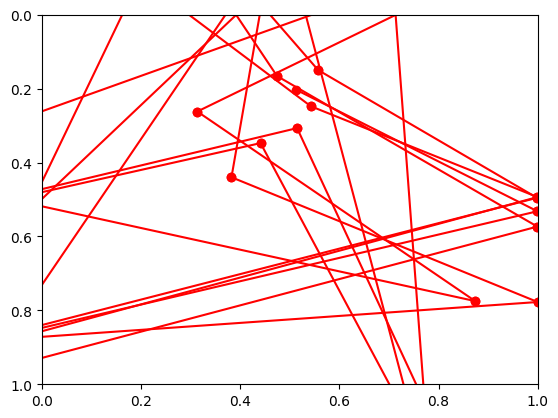

In [48]:
# Asumiendo que tienes una lista de conexiones que define qué keypoints deben conectarse
# Por ejemplo, si el punto 0 se conecta con el punto 1, el punto 1 con el 2, etc.
# Generar conexiones en pares secuenciales
connections = [(i, i + 1) for i in range(31) if i < 30]
connections

# Tu función update_keypoints necesitaría saber sobre estas conexiones para dibujar las líneas correctamente
def update_keypoints(num, keypoints, lines, connections):
    for line, connection in zip(lines, connections):
        start_point = keypoints[num][connection[0]*3:connection[0]*3+2]  # x, y for start point
        end_point = keypoints[num][connection[1]*3:connection[1]*3+2]    # x, y for end point
        line.set_data([start_point[0], end_point[0]], [start_point[1], end_point[1]])
    return lines

# Función para animar el avatar para un número
def animate_number(number, connections):
    keypoints = load_keypoints_for_number(number)
    
    fig, ax = plt.subplots()
    
    # Crear una línea de matplotlib para cada conexión
    lines = [ax.plot([], [], 'ro-')[0] for _ in connections]
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.invert_yaxis()
    
    # Crear la animación usando la función 'update_keypoints'
    ani = animation.FuncAnimation(fig, update_keypoints, frames=30, fargs=(keypoints, lines, connections),
                                  interval=100, blit=True)
    
    plt.show()

# Asumiendo que tienes una lista de conexiones entre los keypoints
# Esta lista deberá ser creada basada en cómo MediaPipe conecta los puntos
# connections = ...

# Ejemplo de cómo animar el número 1
animate_number('1', connections)


In [37]:
# Función para cargar los keypoints de un archivo .npy
def load_action_data(action):
    frames_data = []
    for frame_num in range(sequence_length):
        frame_file = os.path.join(DATA_PATH, action, '0', f'{frame_num}.npy') # Asumiendo que solo hay una secuencia por acción
        frame_data = np.load(frame_file)
        frames_data.append(frame_data)
    return frames_data

In [42]:
def load_keypoints_for_number(number):
    keypoints = []
    for frame_num in range(30):  # Asumiendo que hay 30 frames por video
        filename = f'{DATA_PATH}/{number}/0/{frame_num}.npy'
        keypoints.append(np.load(filename))
    return keypoints

In [44]:
# Función para actualizar los puntos en la animación
def update_keypoints(num, keypoints, line):
    # Actualizamos los puntos en la línea con los nuevos keypoints
    line.set_data(keypoints[num][0::3], keypoints[num][1::3])  # x y y coordenadas
    return line,

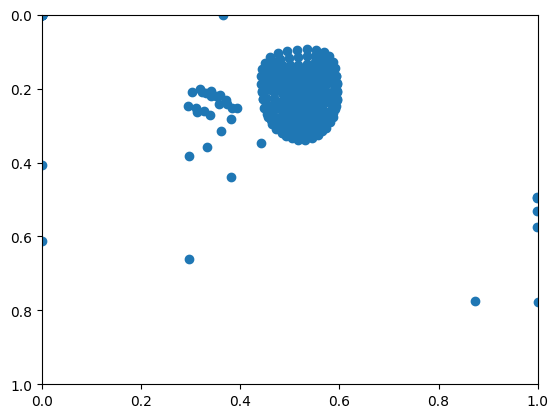

In [45]:
# Función para animar el avatar para un número
def animate_number(number):
    # Cargar los keypoints para el número dado
    keypoints = load_keypoints_for_number(number)

    # Configuración inicial de la figura de matplotlib
    fig, ax = plt.subplots()
    line, = ax.plot([], [], 'o')  # 'o' para dibujar los keypoints como puntos
    ax.set_xlim(0, 1)  # Asumiendo que los keypoints están normalizados
    ax.set_ylim(0, 1)
    ax.invert_yaxis()  # Invertir el eje y para que el sistema de coordenadas sea como en la imagen

    # Crear la animación usando la función 'update_keypoints'
    ani = animation.FuncAnimation(fig, update_keypoints, frames=30, fargs=(keypoints, line),
                                  interval=100, blit=True)  # 100ms entre frames

    plt.show()

# Ejemplo de cómo animar el número 1
animate_number('1')

In [38]:
# Diccionario para almacenar los datos de todos los números
actions_data = {}

# Cargar los datos para cada acción
for action in actions:
    actions_data[action] = load_action_data(action)

In [40]:
actions_data

{'0': [array([ 0.48651201,  0.19180502, -0.55446428, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.52387202,  0.17486879, -0.55980933, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.54574072,  0.16079059, -0.5497039 , ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.54590958,  0.16110155, -0.54981166, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.54429442,  0.16186462, -0.56742477, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.54769534,  0.16239513, -0.56708992, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.54407078,  0.16317566, -0.57009351, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.54160392,  0.16314627, -0.57152534, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.54057634,  0.16351533, -0.58216006, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.53912127,  0.16384646, -0.5841161 , ...,  0.        ,
  

In [31]:
import cv2
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

# Inicializa MediaPipe Hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Captura de video
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        continue

    # Aplica MediaPipe para detectar las manos
    results = hands.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    # Crea un lienzo para dibujar el avatar
    avatar_frame = np.zeros(frame.shape, dtype=np.uint8)

    # Dibuja los landmarks de la mano
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(avatar_frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    # Muestra el avatar en una ventana
    cv2.imshow('Hand Gestures Avatar', avatar_frame)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [1]:
import tkinter

In [3]:
ventana = tkinter.Tk()
ventana.geometry("4000 x300")

def saludo():
  print

ventana.mainloop()

TclError: bad geometry specifier "4000 x300"

In [ ]:
import tkinter as tk
import numpy as np
import cv2
from PIL import Image, ImageTk

# Suponiendo que tienes una función para cargar los keypoints y otra para dibujar el avatar
def load_keypoints(number):
    # Cargar los keypoints del archivo .npy para el número dado
    return np.load(f'keypoints_{number}.npy')

def draw_avatar(keypoints):
    # Dibuja el avatar basado en keypoints
    # Retorna una imagen PIL o ImageTk para mostrar en la GUI
    pass

# Crear la ventana principal de la GUI
root = tk.Tk()

# Función para manejar la lógica de "Traducir"
def translate_number():
    # Aquí va la lógica para obtener el número seleccionado
    selected_number = ...
    keypoints = load_keypoints(selected_number)
    avatar_image = draw_avatar(keypoints)
    avatar_label.config(image=avatar_image)
    avatar_label.image = avatar_image  # Mantener una referencia

# Añadir botones para números y "Traducir"
for number in range(11):
    btn = tk.Button(root, text=str(number), command=lambda n=number: translate_number(n))
    btn.pack(side=tk.LEFT)

# Botón para "Traducir"
translate_btn = tk.Button(root, text="Traducir", command=translate_number)
translate_btn.pack(side=tk.LEFT)

# Etiqueta para mostrar el avatar
avatar_label = tk.Label(root)
avatar_label.pack(side=tk.LEFT)

# Iniciar el bucle de eventos de la GUI
root.mainloop()
